In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORT DATA FROM CSV FILES

In [52]:
fact_sales = pd.read_csv('../data_raw/fact_sales_normalized.csv')
dim_campaigns = pd.read_csv('../data_raw/dim_campaigns.csv')
dim_customers = pd.read_csv('../data_raw/dim_customers.csv')    
dim_products = pd.read_csv('../data_raw/dim_products.csv')
dim_salespersons = pd.read_csv('../data_raw/dim_salespersons.csv')
dim_stores = pd.read_csv('../data_raw/dim_stores.csv')

## FACT SALES

In [53]:
fact_sales.head(10)

,sales_sk,sales_id,customer_sk,product_sk,store_sk,salesperson_sk,campaign_sk,sales_date,total_amount
0,1,SALES_0000001,56504,167,191,1442,3,2024-02-19T15:28:02,2421.54
1,2,SALES_0000002,59945,100,422,1996,8,2024-03-14T09:07:51,2487.22
2,3,SALES_0000003,54709,71,411,1388,35,2024-10-02T13:50:38,2915.91
3,4,SALES_0000004,77739,137,242,1211,6,2024-05-06T20:17:06,4086.90
4,5,SALES_0000005,97840,207,380,570,19,2024-08-23T22:09:16,2425.33
5,6,SALES_0000006,34490,82,183,1413,36,2024-10-28T11:45:32,2984.71
6,7,SALES_0000007,11517,6,90,233,18,2024-07-02T21:18:14,2786.61
7,8,SALES_0000008,84297,113,74,710,5,2024-05-07T12:58:03,521.55
8,9,SALES_0000009,29497,15,149,393,32,2024-11-07T01:31:03,1579.17
9,10,SALES_0000010,89678,3,356,540,15,2024-07-15T19:38:42,2673.58


In [54]:
fact_sales.isnull().sum()

sales_sk          0
sales_id          0
customer_sk       0
product_sk        0
store_sk          0
salesperson_sk    0
campaign_sk       0
sales_date        0
total_amount      0
dtype: int64

In [55]:
fact_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   sales_sk        1000000 non-null  int64  
 1   sales_id        1000000 non-null  object 
 2   customer_sk     1000000 non-null  int64  
 3   product_sk      1000000 non-null  int64  
 4   store_sk        1000000 non-null  int64  
 5   salesperson_sk  1000000 non-null  int64  
 6   campaign_sk     1000000 non-null  int64  
 7   sales_date      1000000 non-null  object 
 8   total_amount    1000000 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 68.7+ MB


In [56]:
# Convert sales_date pandas datetime
fact_sales["sales_date"] = pd.to_datetime(fact_sales["sales_date"], errors="coerce")

In [57]:
# Convert surrogate keys to integers
key_columns = [
    "product_sk",
    "store_sk",
    "salesperson_sk",
    "campaign_sk"
]

fact_sales[key_columns] = fact_sales[key_columns].astype("int64")

In [58]:
fact_sales.describe()

,sales_sk,customer_sk,product_sk,store_sk,salesperson_sk,campaign_sk,sales_date,total_amount
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,1000000.000000
mean,500000.500000,50011.753443,105.604332,250.392523,1000.371922,25.502230,2024-07-30 19:54:39.402340352,2750.874595
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024-01-02 00:13:14,500.000000
25%,250000.750000,24992.000000,53.000000,125.000000,501.000000,13.000000,2024-05-24 07:24:13,1628.300000
50%,500000.500000,50027.500000,106.000000,250.000000,1000.000000,26.000000,2024-08-16 15:58:16,2750.530000
75%,750000.250000,74980.000000,158.000000,375.000000,1500.000000,38.000000,2024-10-14 05:21:19.750000128,3875.352500
max,1000000.000000,100000.000000,210.000000,500.000000,2000.000000,50.000000,2024-12-26 23:49:15,4999.980000
std,288675.278932,28859.467198,60.679945,144.316563,577.265764,14.439062,NaN,1298.902436


## DIM CAMPAIGNS

In [59]:
dim_campaigns.head(10)

,campaign_sk,campaign_id,campaign_name,start_date_sk,end_date_sk,campaign_budget
0,6,CAMP_006,Mega Weekend Bonanza,37,41,231714
1,24,CAMP_024,Red Tag Clearance,27,55,701892
2,39,CAMP_039,Midnight Madness,30,91,396601
3,36,CAMP_036,Shop & Save Spectacular,15,101,287542
4,47,CAMP_047,"Gift More, Spend Less",104,141,585808
5,12,CAMP_012,Clearance Countdown,92,145,831755
6,37,CAMP_037,Early Bird Specials,12,164,979514
7,7,CAMP_007,New Year Kickoff,47,166,581298
8,13,CAMP_013,Holiday Shopping Rush,124,172,534045
9,9,CAMP_009,Back to School Boost,160,196,461504


In [60]:
dim_campaigns.isnull().sum()

campaign_sk        0
campaign_id        0
campaign_name      0
start_date_sk      0
end_date_sk        0
campaign_budget    0
dtype: int64

In [61]:
dim_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   campaign_sk      50 non-null     int64 
 1   campaign_id      50 non-null     object
 2   campaign_name    50 non-null     object
 3   start_date_sk    50 non-null     int64 
 4   end_date_sk      50 non-null     int64 
 5   campaign_budget  50 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [62]:
# CHECK UNIQUENESS OF campaign_sk 
dim_campaigns["campaign_sk"].is_unique

True

## DIM CUSTOMERS

In [63]:
dim_customers.head(5)

,customer_sk,customer_id,first_name,last_name,email,residential_location,customer_segment
0,1,CUST_00001,Chelsey,Francis,chelsey.francis@gmail.com,Boston,High Value
1,2,CUST_00002,Chad,Herrera,chad.herrera@gmail.com,San Antonio,Churn Risk
2,3,CUST_00003,Calvin,Hale,calvin.hale@yahoo.com,Fort Worth,Churn Risk
3,4,CUST_00004,Richard,Smith,richard.smith@outlook.com,Denver,First-time Buyer
4,5,CUST_00005,Daniel,Mays,daniel.mays@yahoo.com,Virginia Beach,Online Shopper


In [64]:
dim_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_sk           100000 non-null  int64 
 1   customer_id           100000 non-null  object
 2   first_name            100000 non-null  object
 3   last_name             100000 non-null  object
 4   email                 100000 non-null  object
 5   residential_location  100000 non-null  object
 6   customer_segment      100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [65]:
dim_customers.isna().sum()

customer_sk             0
customer_id             0
first_name              0
last_name               0
email                   0
residential_location    0
customer_segment        0
dtype: int64

## DIM PRODUCTS

In [66]:
dim_products.head(5)

,product_sk,product_id,product_name,category,brand,origin_location
0,1,PROD_00001,Bravia X90J TV,Electronics,Sony,Kansas City
1,2,PROD_00002,WH-1000XM4 Headphones,Electronics,Sony,San Francisco
2,3,PROD_00003,PlayStation 5,Electronics,Sony,San Jose
3,4,PROD_00004,4K Blu-ray Player,Electronics,Sony,Los Angeles
4,5,PROD_00005,Noise Cancelling Earbuds,Electronics,Sony,Memphis


In [67]:
dim_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_sk       210 non-null    int64 
 1   product_id       210 non-null    object
 2   product_name     210 non-null    object
 3   category         210 non-null    object
 4   brand            210 non-null    object
 5   origin_location  210 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.0+ KB


In [68]:
dim_products.isna().sum()

product_sk         0
product_id         0
product_name       0
category           0
brand              0
origin_location    0
dtype: int64

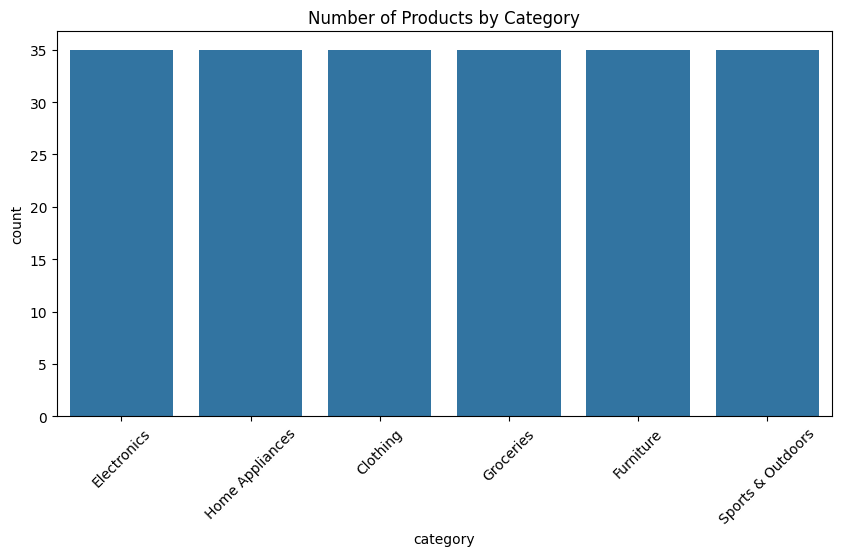

In [69]:
# NUMBER OF PRODUCTS BY CATEGORY
plt.figure(figsize=(10,5))
sns.countplot( data=dim_products, x="category", order=dim_products["category"].value_counts().index)
plt.title("Number of Products by Category")
plt.xticks(rotation=45)
plt.show()

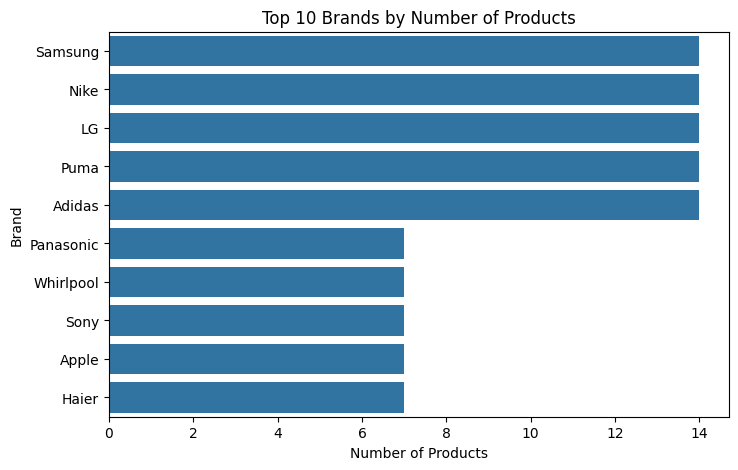

In [70]:
# TOP 10 BRANDS BY NUMBER OF PRODUCTS
top_brands = dim_products["brand"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot( x=top_brands.values,y=top_brands.index)
plt.title("Top 10 Brands by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

## DIM_SALESPERSONS

In [71]:
dim_salespersons.head(5)

,salesperson_sk,salesperson_id,salesperson_name,salesperson_role
0,1,SP00001,John Norris,Salesperson
1,2,SP00002,Richard Avery,Manager
2,3,SP00003,Julie Avila,Manager
3,4,SP00004,Rhonda Mccarthy,Salesperson
4,5,SP00005,Kathryn Jackson,Salesperson


In [72]:
dim_salespersons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   salesperson_sk    2000 non-null   int64 
 1   salesperson_id    2000 non-null   object
 2   salesperson_name  2000 non-null   object
 3   salesperson_role  2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


## DIM_STORES

In [73]:
dim_stores.head(5)

,store_sk,store_id,store_name,store_type,store_location,store_manager_sk
0,1,STR_00001,TechWorld,Large Malls / Complexes,Los Angeles,670
1,2,STR_00002,Roomify,Small Stores / Shops,Baltimore,171
2,3,STR_00003,EcoMart,Supermarkets,Phoenix,12
3,4,STR_00004,TechBazaar,Small Stores / Shops,Tampa,1450
4,5,STR_00005,FurniCart,Large Malls / Complexes,San Antonio,175


In [74]:
dim_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   store_sk          500 non-null    int64 
 1   store_id          500 non-null    object
 2   store_name        500 non-null    object
 3   store_type        500 non-null    object
 4   store_location    500 non-null    object
 5   store_manager_sk  500 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


## CHECK COLUMNS OF ALL DATAFRAME

In [75]:
fact_sales.columns

Index(['sales_sk', 'sales_id', 'customer_sk', 'product_sk', 'store_sk',
       'salesperson_sk', 'campaign_sk', 'sales_date', 'total_amount'],
      dtype='object')

In [76]:
dim_campaigns.columns

Index(['campaign_sk', 'campaign_id', 'campaign_name', 'start_date_sk',
       'end_date_sk', 'campaign_budget'],
      dtype='object')

In [77]:
dim_customers.columns

Index(['customer_sk', 'customer_id', 'first_name', 'last_name', 'email',
       'residential_location', 'customer_segment'],
      dtype='object')

In [78]:
dim_products.columns

Index(['product_sk', 'product_id', 'product_name', 'category', 'brand',
       'origin_location'],
      dtype='object')

In [79]:
dim_salespersons.columns

Index(['salesperson_sk', 'salesperson_id', 'salesperson_name',
       'salesperson_role'],
      dtype='object')

In [80]:
dim_stores.columns

Index(['store_sk', 'store_id', 'store_name', 'store_type', 'store_location',
       'store_manager_sk'],
      dtype='object')

## LOAD DATA TO DATABASE MYSQL

In [ ]:
# LOAD CLEANED DATA TO DATABASE MYSQL
import os
from dotenv import load_dotenv

load_dotenv()  # Read file .env

DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME_RETAIL")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [83]:
from sqlalchemy import create_engine
# CREATE ENGINE TO CONNECT TO MYSQL DATABASE
engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

In [85]:
# CONNECT AND LOAD DATAFRAME TO TABLE "customer_shopping_behaviour" IN MYSQL DATABASE
dim_customers.to_sql( "dim_customers",engine,if_exists="append",index=False)
dim_products.to_sql("dim_products", engine, if_exists="append", index=False)
dim_stores.to_sql("dim_stores", engine, if_exists="append", index=False)
dim_salespersons.to_sql("dim_salespersons", engine, if_exists="append", index=False)
dim_campaigns.to_sql("dim_campaigns", engine, if_exists="append", index=False)
fact_sales.to_sql("fact_sales", engine, if_exists="append", index=False)

1000000